# TELECOM CUSTOMER CHURN PREDICTION

## About Dataset
### The data set includes information about:

---



Customers who left within the last month – the column is called Churn

---


Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies


---


Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges


---


Demographic info about customers – gender, age range, and if they have partners and dependents


---


### What is Customer Churn?

Customer churn occurs when customers or subscribers stop doing business with a firm or service.

In the telecom industry, customers frequently switch between providers, leading to an annual churn rate of 15-25%. This high competition makes individualized customer retention challenging and costly.

Predicting which customers are likely to leave allows companies to focus retention efforts on these "high-risk" clients. The goal is to expand coverage and enhance customer loyalty. Retaining existing customers is more cost-effective than acquiring new ones.

To reduce churn, telecom companies must identify high-risk customers by developing a comprehensive view of their interactions across various channels, such as store visits, purchase histories, customer service calls, online transactions, and social media.

Addressing churn helps telecom companies maintain and grow their market position, lower initiation costs, and increase profits. Therefore, reducing client attrition and implementing effective retention strategies are key to their success.

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [3]:
df = pd.read_csv("/content/Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
missing_values = df.isnull().sum()
print("Missing values in each column")
print(missing_values)

Missing values in each column
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [10]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [11]:
df[np.isnan(df["TotalCharges"])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [12]:
df[df["tenure"] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [13]:
df.drop(labels = df[df['tenure'] == 0].index, axis = 0, inplace = True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [14]:
df.fillna(df["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [15]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df["SeniorCitizen"] = df["SeniorCitizen"].map({0 : "No", 1 : "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df["InternetService"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [18]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [19]:
df['Churn'] = df['Churn'].astype('category')

fig = px.histogram(df, x='gender', color='Churn', barmode='group',
                    labels={'gender': 'Gender', 'Churn': 'Customer Churn'},
                    title='Customer Churn by Gender')

fig.update_layout(xaxis_title='Gender',
                  yaxis_title='Count',
                  legend_title='Churn Status',
                  title_x=0.5)

fig.show()

In [20]:
fig = px.sunburst(df, path=['gender', 'Churn'],
                  title='Distribution of Customer Churn by Gender',
                  labels={'gender': 'Gender', 'Churn': 'Customer Churn'})

fig.update_layout(title_x=0.5)

fig.show()

In [21]:
# Create an interactive bar chart
fig = px.histogram(df, x='Contract', color='Churn',
                    labels={'Contract': 'Contract Type', 'Churn': 'Customer Churn'},
                    title='Customer Churn Distribution by Contract Type',
                    barmode='group')

# Update layout for better readability
fig.update_layout(xaxis_title='Contract Type',
                  yaxis_title='Count',
                  legend_title='Churn Status',
                  title_x=0.5)

# Show the interactive plot
fig.show()

Month-to-Month: High churn rate (42.7%) suggests a lack of long-term commitment.

One-Year: Moderate churn rate (11.3%) shows better retention than month-to-month.

Two-Year: Lowest churn rate (2.8%) demonstrates the highest customer retention.

In [22]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [23]:
fig = px.histogram(df, x='PaymentMethod', color='Churn',
                    labels={'PaymentMethod': 'Payment Method', 'Churn': 'Customer Churn'},
                    title='Customer Churn Distribution by Payment Method',
                    barmode='group')

# Update layout for better readability
fig.update_layout(xaxis_title='Payment Method',
                  yaxis_title='Count',
                  legend_title='Churn Status',
                  title_x=0.5)

# Show the interactive plot
fig.show()

Major customers who moved out were having Electronic Check as Payment Method.

In [24]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [25]:
fig = px.histogram(df, x='InternetService', color='Churn',
                    labels={'InternetService': 'Internet Service', 'Churn': 'Customer Churn'},
                    title='Customer Churn Distribution by Internet Service',
                    barmode='group')

fig.update_layout(xaxis_title='Internet Service',
                  yaxis_title='Count',
                  legend_title='Churn Status',
                  title_x=0.5)

fig.show()

A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.

In [26]:
# Create a grouped bar chart
fig = px.histogram(df, x='Dependents', color='Churn',
                    labels={'Dependents': 'Dependents', 'Churn': 'Customer Churn'},
                    title='Customer Churn Distribution by Dependents',
                    barmode='group')

# Update layout for better readability
fig.update_layout(xaxis_title='Dependents',
                  yaxis_title='Count',
                  legend_title='Churn Status',
                  title_x=0.5)

# Show the interactive plot
fig.show()

Customers without dependents are more likely to churn

In [27]:
# Create a grouped bar chart
fig = px.histogram(df, x='Partner', color='Churn',
                    labels={'Partner': 'Partner', 'Churn': 'Customer Churn'},
                    title='Customer Churn Distribution by Partner Status',
                    barmode='group')

# Update layout for better readability
fig.update_layout(xaxis_title='Partner Status',
                  yaxis_title='Count',
                  legend_title='Churn Status',
                  title_x=0.5)

# Show the interactive plot
fig.show()

Customers that doesn't have partners are more likely to churn

In [28]:
# Create a grouped bar chart
fig = px.histogram(df, x='SeniorCitizen', color='Churn',
                   labels={'SeniorCitizen': 'Senior Citizen', 'Churn': 'Customer Churn'},
                   title='Customer Churn Distribution by Senior Citizen Status',
                   barmode='group')

# Update layout for better readability
fig.update_layout(xaxis_title='Senior Citizen Status',
                  yaxis_title='Count',
                  legend_title='Churn Status',
                  title_x=0.5)

# Show the interactive plot
fig.show()

It can be observed that the fraction of senior citizen is very less.

Most of the senior citizens churn.

In [29]:
# Create a grouped bar chart
fig = px.histogram(df, x='OnlineSecurity', color='Churn',
                   labels={'OnlineSecurity': 'Online Security', 'Churn': 'Customer Churn'},
                   title='Customer Churn Distribution by Online Security Status',
                   barmode='group')

# Update layout for better readability
fig.update_layout(xaxis_title='Online Security Status',
                  yaxis_title='Count',
                  legend_title='Churn Status',
                  title_x=0.5)

# Show the interactive plot
fig.show()

Most customers are likely to churn in the absence of online security.

In [30]:
# Create a grouped bar chart
fig = px.histogram(df, x='OnlineBackup', color='Churn',
                   labels={'OnlineBackup': 'Online Backup', 'Churn': 'Customer Churn'},
                   title='Customer Churn Distribution by Online Backup Status',
                   barmode='group')

# Update layout for better readability
fig.update_layout(xaxis_title='Online Backup Status',
                  yaxis_title='Count',
                  legend_title='Churn Status',
                  title_x=0.5)

# Show the interactive plot
fig.show()

Most customers are likely to churn in the absence of Online Backup.

In [31]:
# Create a grouped bar chart
fig = px.histogram(df, x='DeviceProtection', color='Churn',
                   labels={'DeviceProtection': 'Device Protection', 'Churn': 'Customer Churn'},
                   title='Customer Churn Distribution by Device Protection Status',
                   barmode='group')

# Update layout for better readability
fig.update_layout(xaxis_title='Device Protection Status',
                  yaxis_title='Count',
                  legend_title='Churn Status',
                  title_x=0.5)

# Show the interactive plot
fig.show()

In [32]:
# Create a grouped bar chart
fig = px.histogram(df, x='PaperlessBilling', color='Churn',
                   labels={'PaperlessBilling': 'Paperless Billing', 'Churn': 'Customer Churn'},
                   title='Customer Churn Distribution by Paperless Billing Status',
                   barmode='group')

# Update layout for better readability
fig.update_layout(xaxis_title='Paperless Billing Status',
                  yaxis_title='Count',
                  legend_title='Churn Status',
                  title_x=0.5)

# Show the interactive plot
fig.show()

Customers with Paperless Billing are more likely to churn.

In [33]:
# Create a grouped bar chart
fig = px.histogram(df, x='TechSupport', color='Churn',
                   labels={'TechSupport': 'Tech Support', 'Churn': 'Customer Churn'},
                   title='Customer Churn Distribution by Tech Support Status',
                   barmode='group')

# Update layout for better readability
fig.update_layout(xaxis_title='Tech Support Status',
                  yaxis_title='Count',
                  legend_title='Churn Status',
                  title_x=0.5)

# Show the interactive plot
fig.show()

Customers with no TechSupport are most likely to migrate to another service provider.

In [34]:
# Create a grouped bar chart
fig = px.histogram(df, x='PhoneService', color='Churn',
                   labels={'PhoneService': 'Phone Service', 'Churn': 'Customer Churn'},
                   title='Customer Churn Distribution by Phone Service Status',
                   barmode='group')

# Update layout for better readability
fig.update_layout(xaxis_title='Phone Service Status',
                  yaxis_title='Count',
                  legend_title='Churn Status',
                  title_x=0.5)

# Show the interactive plot
fig.show()

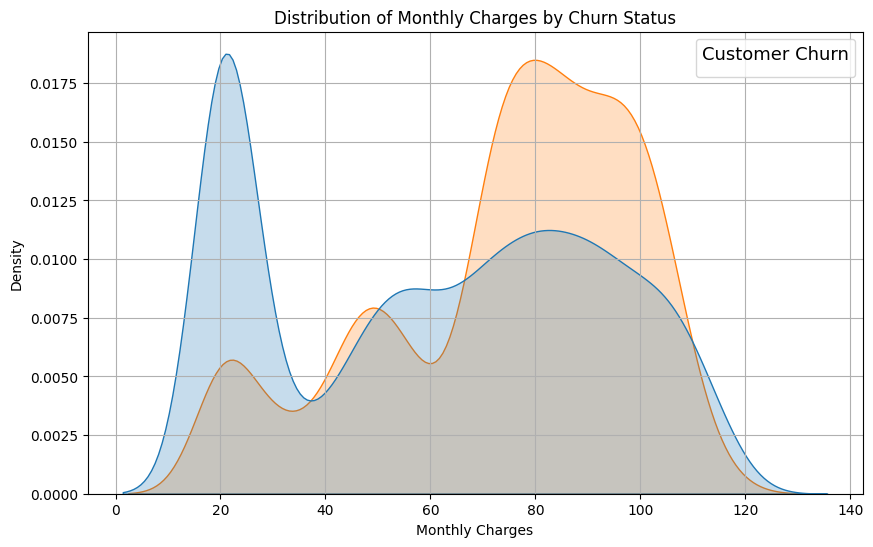

In [39]:
# Create a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, common_norm=False)

# Update the plot with titles, labels, and legend
plt.title('Distribution of Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend(title='Customer Churn', title_fontsize='13', fontsize='11', loc='upper right')
plt.grid(True)

# Show the plot
plt.show()

When monthly charges increase, customers tend to churn.

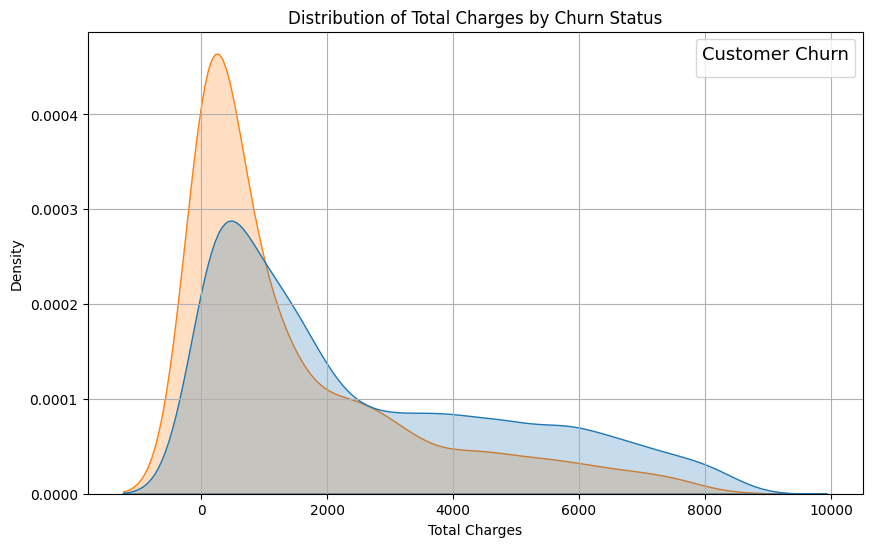

In [40]:
# Create a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='TotalCharges', hue='Churn', fill=True, common_norm=False)

# Update the plot with titles, labels, and legend
plt.title('Distribution of Total Charges by Churn Status')
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.legend(title='Customer Churn', title_fontsize='13', fontsize='11', loc='upper right')
plt.grid(True)

# Show the plot
plt.show()

### Data Preprocessing

In [41]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [42]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,No
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,No
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,Yes
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes


In [44]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [46]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

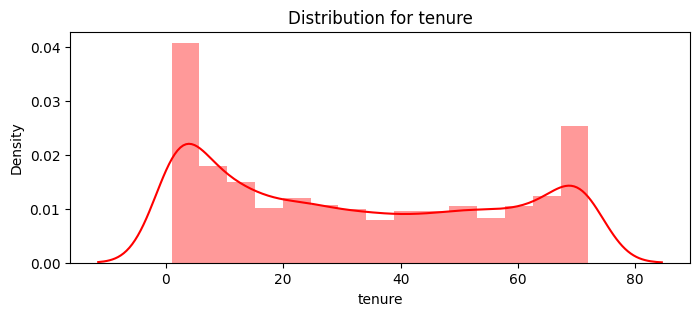

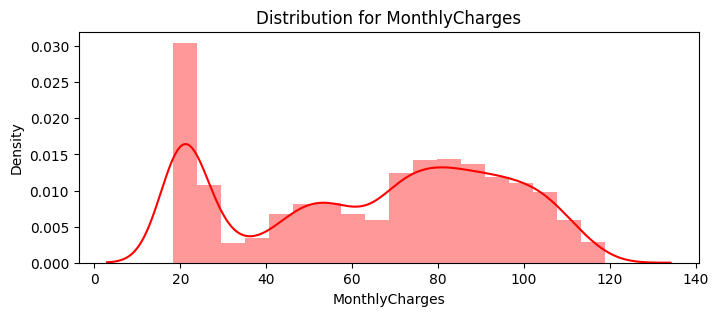

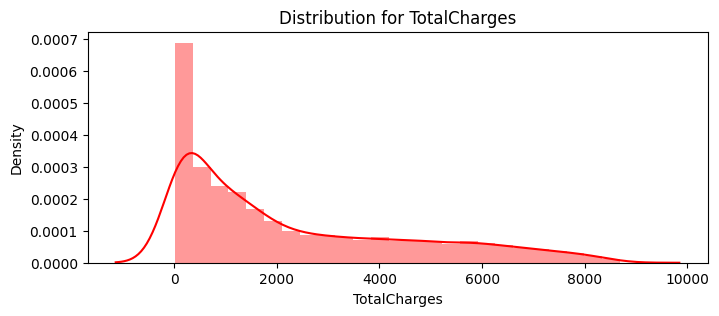

In [47]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

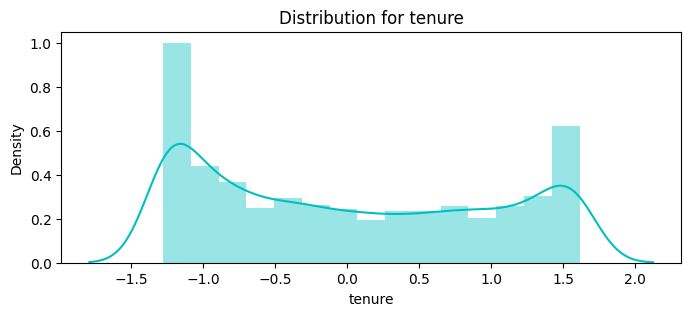

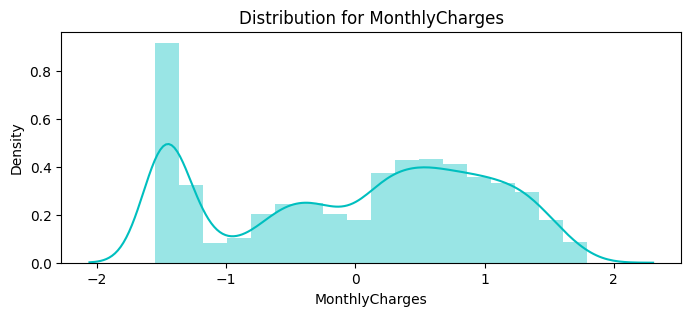

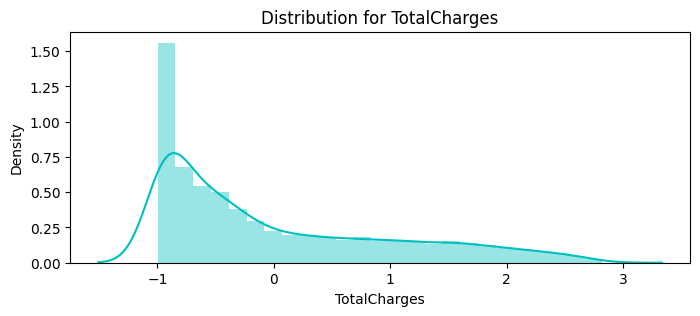

In [48]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

In [49]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [50]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### Machine Learning Model Evaluations and Predictions

knn

In [51]:
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7758293838862559


In [52]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

          No       0.83      0.87      0.85      1549
         Yes       0.59      0.52      0.55       561

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



svc

In [53]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.8075829383886256


In [54]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

          No       0.84      0.92      0.88      1549
         Yes       0.69      0.50      0.58       561

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



Random Forest

In [55]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8137440758293839


In [56]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

          No       0.84      0.92      0.88      1549
         Yes       0.71      0.51      0.59       561

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



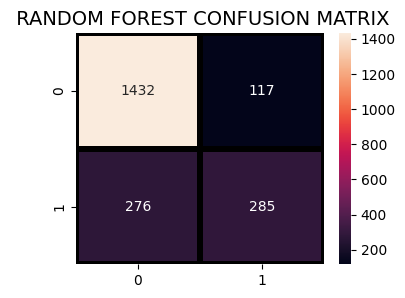

In [57]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

Logistic Regression

In [59]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8090047393364929


In [60]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

          No       0.86      0.89      0.87      1549
         Yes       0.66      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.81      2110



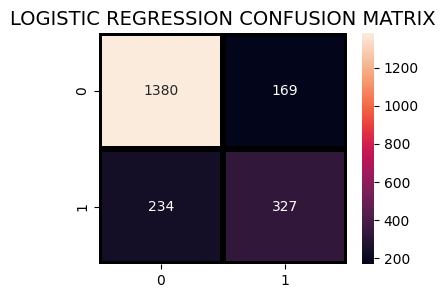

In [61]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

Decision Tree Classifier

In [62]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7227488151658767


In [63]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

          No       0.82      0.80      0.81      1549
         Yes       0.48      0.51      0.49       561

    accuracy                           0.72      2110
   macro avg       0.65      0.65      0.65      2110
weighted avg       0.73      0.72      0.73      2110



AdaBoost Classifier

In [64]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.8075829383886256

In [65]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

          No       0.85      0.90      0.87      1549
         Yes       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



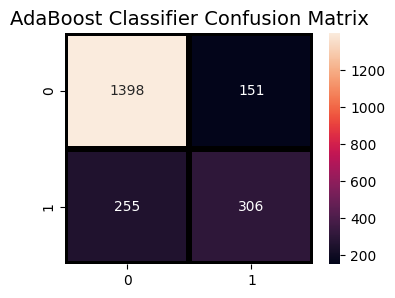

In [66]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

Gradient Boosting Classifier

In [67]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.8080568720379147


In [68]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

          No       0.85      0.90      0.87      1549
         Yes       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



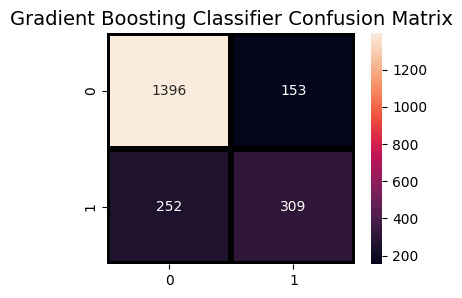

In [69]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

Voting Classifier

In [70]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.8170616113744076


In [71]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.86      0.90      0.88      1549
         Yes       0.68      0.58      0.63       561

    accuracy                           0.82      2110
   macro avg       0.77      0.74      0.75      2110
weighted avg       0.81      0.82      0.81      2110



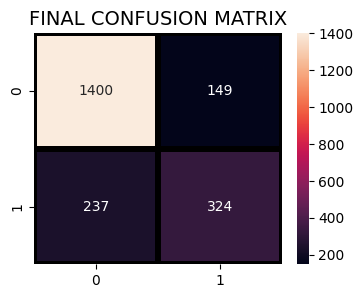

In [72]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

Out of the models I have used above, the Voting Classifier performs better.

This project focuses on predicting customer churn for a telecommunications company using various machine learning models. The dataset includes features such as customer demographics, account information, and service usage patterns. During the exploratory data analysis (EDA) phase, features were categorized for appropriate preprocessing, including standardization, label encoding, and one-hot encoding. The dataset was balanced to address class imbalance between churn and non-churn instances. Several machine learning models were trained and evaluated, with the Voting Classifier ultimately showing the best performance. Interactive visualizations were created to explore the relationships between churn and various features, providing actionable insights to improve customer retention strategies.